# Data Preprocessing

In [ ]:
# Since the code is written in Google Colab, the data drive should be mounted firstly.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Here, we adopt CWRU dataset. You can find the raw data in the [website](https://csegroups.case.edu/bearingdatacenter/pages/welcome-case-western-reserve-university-bearing-data-center-website). Therefore, we can have four class datasets: 
1. Normal
2. Inner Race
3. Ball (centered)
4. Outer Race

In [ ]:
basefn = "/content/drive/My Drive/data/data_cwru/"
data_paths = {
"normal": ["97.mat", "98.mat", "99.mat", "100.mat"],
"inner":  ["105.mat", "106.mat", "107.mat", "108.mat"],
"ball":   ["118.mat", "119.mat", "120.mat", "121.mat"],
"outer":  ["130.mat", "131.mat", "132.mat", "133.mat"]
} 

### Sampling data for augmentation

In [ ]:
num_points = 120000
sample_len = 5120
stride = 128
from scipy.io import loadmat
data = []
for labelidx, label in enumerate(["normal", "inner", "ball", "outer"]):
  fnames = data_paths[label]
  for file_name in fnames:
    x = loadmat(basefn+label+"/"+file_name)
    used_key = [key for key in x.keys() if "DE_time" in key][0]
    time_data = x[used_key]
    time_data = time_data[:num_points]
    #from nested list to list
    time_data =  [ele[0] for ele in time_data]
    # sampling data for augumentation
    for count in range(0, num_points-sample_len, stride):
      sub_data = [labelidx] + time_data[count:count+sample_len]
      sub_data = " ".join([str(f) for f in sub_data])
      data.append(sub_data)

### Data Saving

In [ ]:
df_data = pd.DataFrame({"data":data})

In [ ]:
df_data.to_csv("/content/drive/My Drive/data/data_cwru/cwru_data.txt", index=None)

### Check the sampled data

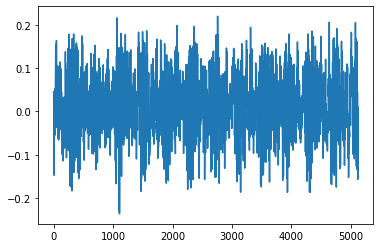

In [ ]:
data_seq = data[102].split(' ')[1:]
data_seq = [float(ele) for ele in data_seq]
plt.plot(data_seq[:12000])